# Regression Model for Rise in Covid-19 cases


# Exploring Data
## Data Processing And Filtration

The dataset for this project originates from the [Our World In Data (Cases)](https://ourworldindata.org/covid-cases). The dataset has almost 26k entries and each of the 26k entries represent data about 33 features for Covid-19 cases for all countries uptill `'25-June-2020'`. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- Out of 33 features 4 important features `'new_tests'`, `'population'`, `'population_density'` and   `'median_age'` have been selected for this project.
- All those selected data points which contain **missing or censored values** have been removed.
- Some data points in `'new_cases'` label have been considered as **outliers** and have been removed.
- After the removal of all the missing entries, 6.4k entries left in the dataset which have been used in the training and testing of the model.

In [6]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

# Importing visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Covid-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Selecting only relevant features
data = data.get(["new_cases", "new_tests", "population", "population_density", "median_age"])

# Removing outliers
data = data[data.new_cases >= 0]
data = data[data.new_cases <= 40000]

# Removing data points which have missing values
data = data.dropna()

# Splitting features and label
cases = data['new_cases']
features = data.drop('new_cases', axis = 1)

# Success - Displaying the records
display(features)

# Success
print("Covd-19 dataset has {} data points.".format(data.shape[0]))

,new_tests,population,population_density,median_age
872,1520.0,45195777.0,16.177,31.9
873,1529.0,45195777.0,16.177,31.9
874,1648.0,45195777.0,16.177,31.9
877,3047.0,45195777.0,16.177,31.9
878,1569.0,45195777.0,16.177,31.9
...,...,...,...,...
25883,427.0,14862927.0,42.729,19.6
25884,524.0,14862927.0,42.729,19.6
25885,302.0,14862927.0,42.729,19.6
25886,334.0,14862927.0,42.729,19.6


Covd-19 dataset has 6465 data points.


### Statistical Analysis
First of all we will analyze the Covid-19 data-set by descriptive statistics about `'New cases'`.

In the code cell below, we will be calculating the following:
- Minimum, maximum, mean, median, and standard deviation of `'New cases'`, which is stored in `cases` variable.

In [7]:
# Minimum cases of the data
minimum_cases = np.amin(cases)

# Maximum cases of the data
maximum_cases = np.amax(cases)

# Mean cases of the data
mean_cases = np.mean(cases)

# Median cases of the data
median_cases = np.median(cases)

# Standard deviation of cases of the data
std_cases = np.std(cases)

# Printing the calculated statistics
print("Statistics for Covid-19 dataset:\n")
print("Minimum number of cases: {}".format(minimum_cases)) 
print("Maximum number of cases: {}".format(maximum_cases))
print("Mean of cases: {}".format(mean_cases))
print("Median cases: {}".format(median_cases))
print("Standard deviation of cases: {}".format(std_cases))

Statistics for Covid-19 dataset:

Minimum number of cases: 0.0
Maximum number of cases: 37289.0
Mean of cases: 915.8626450116009
Median cases: 71.0
Standard deviation of cases: 3233.657910834807


### Performance Metric function
For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify the model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

In [8]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculating the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_predict, y_true)

    # Return the score
    return score

### Shuffle and Split Data

In [9]:
# Shuffle and spliting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, cases, test_size=0.2, random_state=2)

# Success
print("Training and testing split was successful.")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training and testing split was successful.
Training set has 5172 samples.
Testing set has 1293 samples.


---
## Analyzing Model Performance
Now we will be analyzing the **learning and testing** performance of the model on the filtered data from the data-set.
For this data-set we will be using `'Decision Tree Regressor'` and by increasing`'max_depth'` parameter on the full training set will helps us to observe how model complexity affects performance.

### Learning Curves
The following code cell produces four graphs for a `'Decision Tree Regresor'` model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. The shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using `'performance metric'` function.

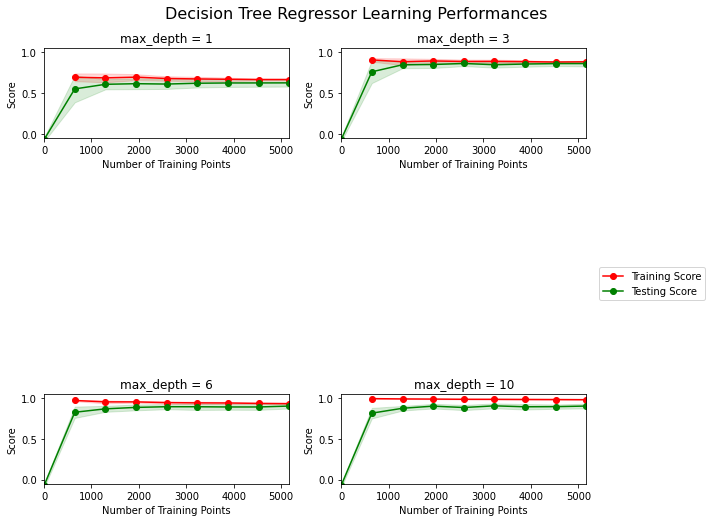

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, cases)

### Complexity Curves
The following code cell produces a graph for a `'Decision Tree Regressor'` model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

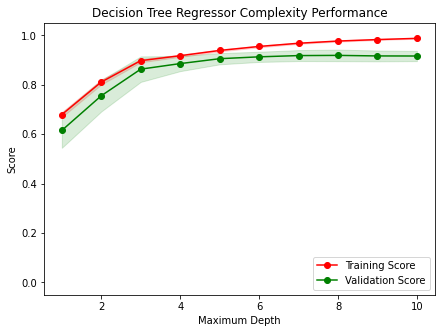

In [11]:
vs.ModelComplexity(X_train, y_train)

---
## Training Model
Now we will train a model using the **decision tree algorithm**. We will be using `'grid search technique'` to ensure that we are producing an optimized model and this will also helps in the optimization of `'max_depth'` parameter for the decision tree.

We will also be using `'cross validation'` technique which will also optimize the learning process of the model.

- Information about the model [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- Information about scoring function [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)
- Information about [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [17]:
# Importing 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Creating cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 2)
    
    # Initialzing and Creating a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Creating a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = { "max_depth" : np.arange(1, 11) }
    
    # Transforming 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Creating the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [18]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model.


---
## Testing Model
Now after training we will be testing our optimized model from the **data seperated for testing**. 

Model has a coefficient of determination, R^2, of 0.859.




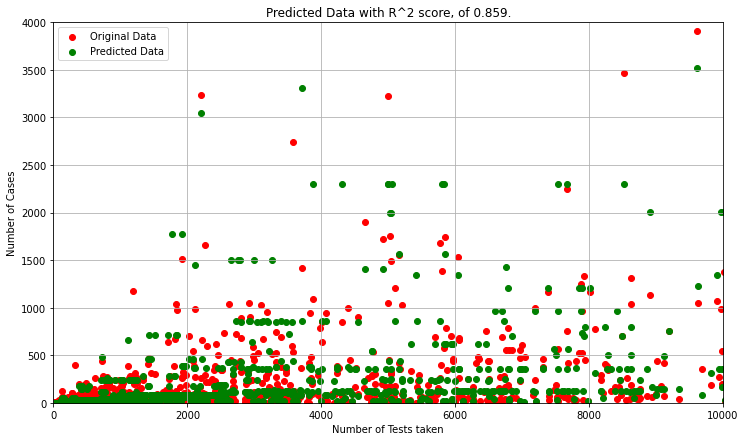

In [19]:
# Testing the model
y_pred = reg.predict(X_test)

# Calculate the performance of this model
score = performance_metric(y_test, y_pred)
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))
print('\n')

# Plotting the data in the graph
plt.figure(figsize=(12, 7))
plt.grid(True)
plt.scatter(X_test["new_tests"][:], y_test[:], color='r', label="Original Data")
plt.scatter(X_test["new_tests"][:], y_pred[:], color="g", label="Predicted Data")

# Setting limit for x and y axis values
plt.xlim(0, 10000)
plt.ylim(0, 4000)

plt.title('Predicted Data with R^2 score, of {:.3f}.'.format(score))
plt.xlabel("Number of Tests taken")
plt.ylabel("Number of Cases")
plt.legend(loc = 'upper left')
plt.show()

In [20]:
# Ecporting the tree in a file model_tree.pdf
from sklearn import tree
import graphviz

columns = list(X_train.columns)
tree_data = tree.export_graphviz(reg, feature_names=columns)
graph = graphviz.Source(tree_data)
graph.render("model_tree", view=True)

'model_tree.pdf'

---
## Predicting Number of Cases
Now we will predict number of cases by giving our own input values. For predicting number of cases we have to input features as given below:

| Feature | Infection Prediction 1 | Infection Prediction 2 | Infection Prediction 3 |
| :---: | :---: | :---: | :---: |
| New Tests taken | 112 tests | 512 tests | 1024 tests |
| Population of the country | 45195777.0 | 14862927.0 | 45195777.0 |
| Population Density of the country | 16.177 | 42.729 | 16.177 |
| Median age of the country |31.9 | 19.6 | 31.9 |


In [21]:
# Produce a matrix for data
infection_data = [[112, 45195777.0, 16.177, 31.9], # Infection Prediction 1
               [512, 14862927.0, 42.729, 19.6], # Infection Prediction 2
               [1024, 45195777.0, 16.177, 31.9]]  # Infection Prediction 3

# Show predictions
for i, cases in enumerate(reg.predict(infection_data)):
    print("{}. Predicted number of new infection cases : {:,.2f}".format(i+1, int(cases)))

1. Predicted number of new infection cases : 2.00
2. Predicted number of new infection cases : 26.00
3. Predicted number of new infection cases : 67.00
